In [92]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2.0)

In [93]:
gpu_data = pd.read_csv('gpu.csv', index_col=0)

(0.0018, 0.002)

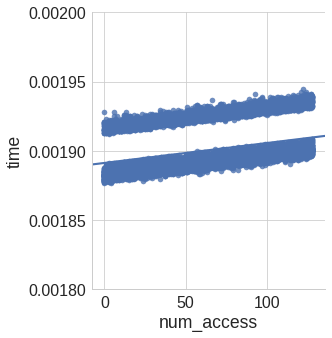

In [94]:
lm = sns.lmplot('num_access', 'time', gpu_data)
lm.axes[0, 0].set_ylim(1.8e-3, 2e-3)

In [95]:
result = sm.ols(formula="time ~ num_access", data=gpu_data).fit()
result.params

Intercept     1.891186e-03
num_access    1.437675e-07
dtype: float64

### Conclusion
Each l2 access takes 140 cycle.

In [96]:
sim_data = pd.read_csv('sim.csv', index_col=0);sim_data

,benchmark,env,num_access,time
0,l2_read,sim,0,0.001875
1,l2_read,sim,4,0.001876
2,l2_read,sim,8,0.001876
3,l2_read,sim,12,0.001877
4,l2_read,sim,16,0.001878
5,l2_read,sim,20,0.001878
6,l2_read,sim,24,0.001879
7,l2_read,sim,28,0.001879
8,l2_read,sim,32,0.001880
9,l2_read,sim,36,0.001881


In [97]:
full_data = gpu_data.append(sim_data, ignore_index=True)

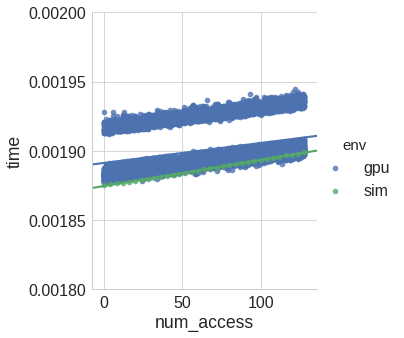

In [98]:
lm3 = sns.lmplot('num_access', 'time', full_data, hue='env')
lm3.axes[0, 0].set_ylim(1.8e-3, 2.0e-3)
plt.savefig('l2_microbenchmark.pdf')

In [99]:
result = sm.ols(formula="time ~ num_access", data=sim_data).fit()
result.params

Intercept     1.874527e-03
num_access    1.880960e-07
dtype: float64

### Best configuration

DRAM latency 300
L2 latency 100 + 3(dir lookup)
L1 Latency 1
